L 51.746804735448904
C_mM 0.11984188583311728
25
425.0
32
460.0
19
395.0
15
375.0
19
395.0


NameError: name 'stop' is not defined

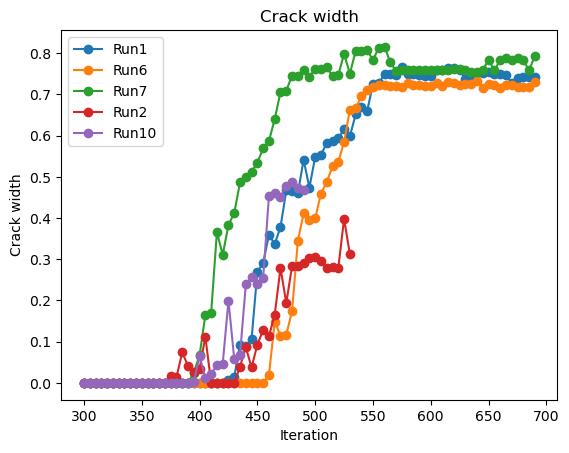

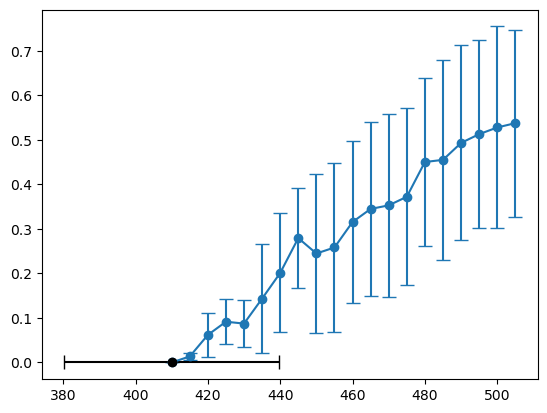

In [1]:
### THIS AVERAGES OVER JUST THE CRACK INCREASE PART, NOT EXACTLY CORRECT! USE THE CODE IN THE SECOND SNIPPET IN THIS NOTEBOOK
import os
import numpy as np
from matplotlib import pyplot as plt
import param as p
# Define folder names
run_folders = [f"Run{i}" for i in [1,6,7,2,10]]##[1,2,6,7,9,10]]##[1,7]]##[1,2,6,7,9,10]]##[1,2,3,4,5,6,7,8,9,10]]##

plt.figure()
plt.title('Crack width')
# Define the file name
file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []
start_ite_list=[]

ite_arr_init=np.arange((p.lam_step-1)/(p.e_rate*p.del_t),600,5)##np.append(np.array(0),np.arange((p.lam_step-1)/(p.e_rate*p.del_t),600,10))
len_data=20##35
# Get current directory
current_dir = os.getcwd()
crack_width_arr=[]

len_data_after_crack_start=len_data#30
data_after_crack_start=[]
##ite_after_crack_start=np.arange(0,600,10)
# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder, file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data=data[1:,:] ## remove the initial zero
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                crack_width_arr.append(data[0:len_data,1])
                start_ite=np.where(data[:,1]>0)[0][0]
                print(start_ite)
                print(data[start_ite,0])
                ##print(data)
                start_ite_list.append(start_ite)
                data_after_crack_start.append(data[start_ite-1:len_data_after_crack_start+start_ite-1,1])
                #print(data)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Crack width')

'''
ite_arr=data[0:len_data,0]
crack_width_arr=np.array(crack_width_arr)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
plt.errorbar(ite_arr,mean_crack_width, yerr=std_crack_width,fmt='-o', capsize=5)
plt.errorbar(np.mean(ite_arr_init[start_ite_list]),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)
'''

##ite_arr=data[0:len_data,0]
crack_width_arr=np.array(data_after_crack_start)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
x=np.mean(ite_arr_init[start_ite_list])+ite_arr_init[0:len_data_after_crack_start]-(p.lam_step-1)/(p.e_rate*p.del_t)
y=mean_crack_width
yerr=std_crack_width
plt.errorbar(x,y, yerr=yerr,fmt='-o', capsize=5)
data = np.column_stack((x, y, yerr))
plt.errorbar(np.mean(ite_arr_init[start_ite_list]),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)

np.savetxt('avg_crack_width.txt',data)
np.savetxt('avg_crack_start.txt',np.array([np.mean(ite_arr_init[start_ite_list]),np.std(ite_arr_init[start_ite_list])]))
stop
file_name = "gini_coeff.txt"

plt.figure()
plt.title('Gini_coeff chain length')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini chain length')


plt.figure()
plt.title('Gini_coeff force')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,2],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini force')

stop

file_name = "mean_end_to_end_distance_normtxt"

plt.figure()
plt.title('Mean end to end distance')
# Define the file name
##file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []

# Get current directory
current_dir = os.getcwd()

# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder+'/0/', file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Gini chain length')

stop
# Compute the average if data is collected
if data_list:
    # Stack and average data
    stacked_data = np.vstack(data_list)
    average_data = np.mean(stacked_data, axis=0)
    print("Average data:")
    print(average_data)
else:
    print("No data to average.")


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import param as p
# Define folder names
run_folders = [f"Run{i}" for i in  [1,6,7]]#,2,10]]##[1,2,6,7,9,10]]##[1,7]]##[1,2,6,7,9,10]]##[1,2,3,4,5,6,7,8,9,10]]##

plt.figure()
plt.title('Crack width')
# Define the file name
file_name = "crack_width_ite0.txt"

# Initialize a list to store data from each file
data_list = []
start_ite_list=[]

ite_arr_init=np.arange((p.lam_step-1)/(p.e_rate*p.del_t),690,5)##np.append(np.array(0),np.arange((p.lam_step-1)/(p.e_rate*p.del_t),600,10))
len_data=75##35
# Get current directory
current_dir = os.getcwd()
crack_width_arr=[]

len_data_after_crack_start=len_data#30
data_after_crack_start=[]
##ite_after_crack_start=np.arange(0,600,10)
# Iterate through each folder
for run_folder in run_folders:
    file_path = os.path.join(current_dir, run_folder, file_name)
    # Check if the file exists
    if os.path.isfile(file_path):
        try:
            # Read the file content
            with open(file_path, 'r') as f:
                data = np.loadtxt(f)
                data=data[1:,:] ## remove the initial zero
                data_list.append(data)
                plt.plot(data[:,0],data[:,1],'o-',label=str(run_folder))
                crack_width_arr.append(data[0:len_data,1])
                start_ite=np.where(data[:,1]>0)[0][0]
                print(start_ite)
                print(data[start_ite,0])
                ##print(data)
                start_ite_list.append(start_ite)
                data_after_crack_start.append(data[0:len_data_after_crack_start,1])
                ##data_after_crack_start.append(data[start_ite-1:len_data_after_crack_start+start_ite-1,1])
                #print(data)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist!")

plt.legend() 
plt.xlabel('Iteration')
plt.ylabel('Crack width')

'''
ite_arr=data[0:len_data,0]
crack_width_arr=np.array(crack_width_arr)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
plt.errorbar(ite_arr,mean_crack_width, yerr=std_crack_width,fmt='-o', capsize=5)
plt.errorbar(np.mean(ite_arr_init[start_ite_list]),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)
'''

##ite_arr=data[0:len_data,0]
crack_width_arr=np.array(data_after_crack_start)

mean_crack_width=np.mean(crack_width_arr,axis=0)
std_crack_width=np.std(crack_width_arr,axis=0)

plt.figure()
x=ite_arr_init[0:len_data_after_crack_start]-0*(p.lam_step-1)/(p.e_rate*p.del_t)##np.mean(ite_arr_init[start_ite_list])+ite_arr_init[0:len_data_after_crack_start]-(p.lam_step-1)/(p.e_rate*p.del_t)
y=mean_crack_width
yerr=std_crack_width
plt.errorbar(x,y, yerr=yerr,fmt='-o', capsize=5)
data = np.column_stack((x, y, yerr))
plt.errorbar(np.mean(ite_arr_init[start_ite_list])-0*(p.lam_step-1)/(p.e_rate*p.del_t),0,xerr=np.std(ite_arr_init[start_ite_list]),fmt='ko', capsize=5)

np.savetxt('avg_crack_width_new.txt',data)
np.savetxt('avg_crack_start_new.txt',np.array([np.mean(ite_arr_init[start_ite_list]),np.std(ite_arr_init[start_ite_list])]))

In [ ]:
ite_arr_init[start_ite_list]

In [ ]:
np.where(data[:,1]>0)[0][0]

In [ ]:
import os
print(os.getcwd())

In [ ]:
(ite_arr_init)

In [ ]:
start_ite_list

In [ ]:
np.shape(data)

In [ ]:
ite_arr_init[start_ite_list]

In [ ]:
data

In [ ]:
(p.lam_step)/(p.e_rate*p.del_t)

In [ ]:
ite_arr_init

In [ ]:
start_ite_list